In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, \
                            recall_score, roc_auc_score, roc_curve, f1_score
import seaborn as sns
from pprint import pprint

In [2]:
# Read data
gameemo = pd.read_csv("csv/out_gameemo.csv")
gameemo.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_6,lag1_mean_7,lag1_mean_8,lag1_mean_9,...,freq_669_13,freq_679_13,freq_689_13,freq_699_13,freq_709_13,freq_720_13,freq_730_13,freq_740_13,freq_750_13,Label
0,-2.934765,0.267884,-2.144542,-2.533547,-3.066073,0.328303,-1.131894,5.429830,-0.836372,8.041636,...,0.007022,0.009016,0.002528,0.004360,0.002872,0.002023,0.004519,0.003357,0.004046,4.0
1,-6.458215,5.005935,-0.725545,8.512712,-17.244226,20.164538,-0.707510,1.786132,-1.287160,-1.528923,...,0.007777,0.003482,0.003310,0.001004,0.001927,0.004033,0.001630,0.002139,0.002550,1.0
2,-1.055457,-0.677152,0.241560,0.079234,-1.386140,-0.207097,-0.201138,-5.107441,1.374121,-0.398227,...,0.006512,0.004879,0.004725,0.003842,0.003871,0.002725,0.002234,0.002157,0.000697,1.0
3,1.104418,0.758306,0.877612,1.910334,5.005314,3.530473,-1.477243,0.118954,-0.916840,-1.358008,...,0.006753,0.008789,0.005344,0.000313,0.002932,0.003106,0.004528,0.003814,0.003689,2.0
4,1.543269,-0.106916,0.183276,-0.624663,0.278018,-0.392274,-0.944821,1.830702,-0.935904,2.064984,...,0.003381,0.001809,0.002519,0.002780,0.010865,0.003386,0.002724,0.007896,0.007865,4.0


# EDA

In [3]:
gameemo["Label"].value_counts()

3.0    10325
2.0     9977
1.0     9892
4.0     9877
Name: Label, dtype: int64

# Random Forest

In [4]:
X = gameemo.drop("Label", axis="columns")
Y = gameemo["Label"]
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, train_size=0.6, random_state=48)

X_validate, X_test, Y_validate, Y_test = train_test_split(X_validate, Y_validate, train_size=0.5, random_state=48)

In [6]:
print(len(X_train))
print(len(Y_train))
print(len(X_validate))
print(len(Y_validate))
print(len(X_test))
print(len(Y_test))

24042
24042
8014
8014
8015
8015


In [7]:
seed = 928
mymodel = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=seed,
                      max_features='auto')
mymodel.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=150, n_jobs=-1,
                       oob_score=True, random_state=928)

In [12]:
mymodel.predict(X_validate[:10])

array([1., 2., 1., 3., 1., 2., 4., 1., 3., 1.])

In [13]:
Y_validate[:10]

27022    1.0
16951    2.0
6223     1.0
15300    3.0
37258    1.0
280      2.0
3295     4.0
39993    1.0
25679    2.0
5256     1.0
Name: Label, dtype: float64

In [14]:
mymodel.score(X_validate, Y_validate)

0.7670326927876217

In [15]:
Y_predicted = mymodel.predict(X_validate)
cm = confusion_matrix(Y_validate, Y_predicted)
cm

array([[1583,  231,   78,  110],
       [ 235, 1469,  126,  159],
       [  66,   93, 1755,  113],
       [ 202,  180,  274, 1340]])

Text(69.0, 0.5, 'Truth')

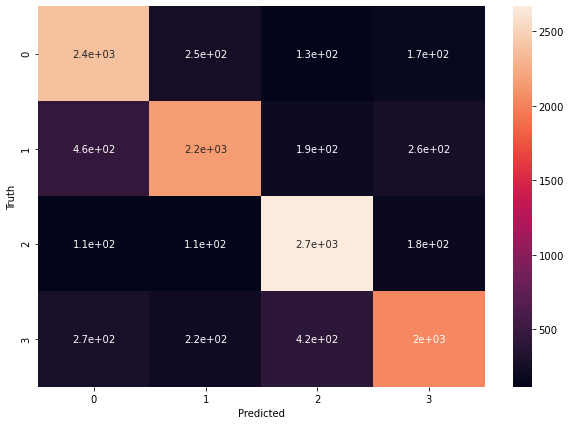

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [16]:
print(mymodel.feature_importances_)
print(f" There are {len(mymodel.feature_importances_)} features in total")


[5.27706533e-05 1.28302208e-05 9.11719415e-05 ... 1.89838388e-04
 9.47273669e-05 6.95658556e-04]
 There are 3738 features in total


In [17]:
feature_importances = list(zip(X_train, mymodel.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
#[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

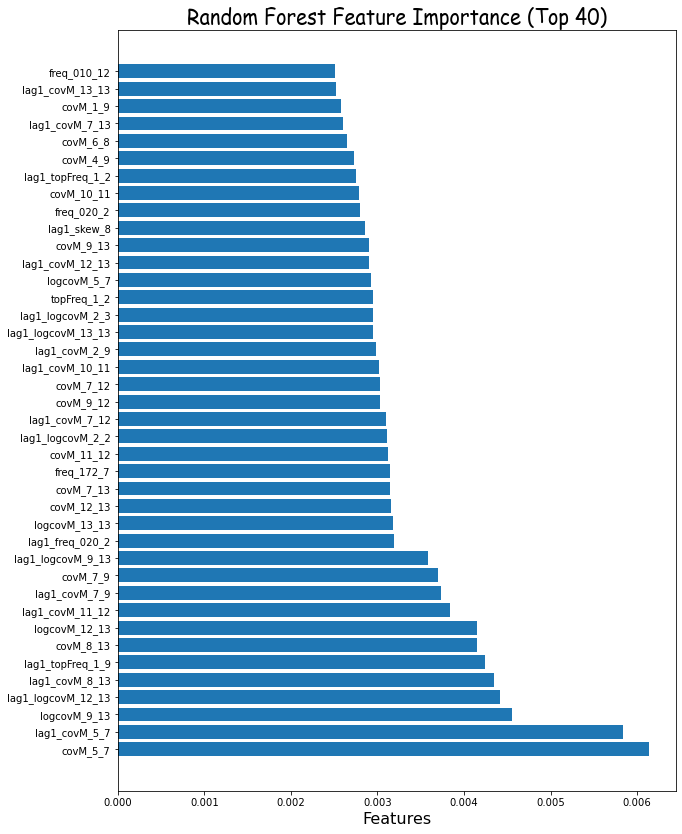

In [32]:
# Plot the top 25 feature importance
feature_names_40 = [i[0] for i in feature_importances_ranked[:40]]
y_ticks = np.arange(0, len(feature_names_40))
x_axis = [i[1] for i in feature_importances_ranked[:40]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_40, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 40)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

# feature reduction

In [23]:
feature_db = pd.DataFrame(feature_importances_ranked, columns = ["feature", "importance"])

In [35]:
feature_db_important = feature_db[feature_db["importance"] > 0.001]

In [40]:
feature_db_important.head()

,feature,importance
0,covM_5_7,0.006139
1,lag1_covM_5_7,0.005834
2,logcovM_9_13,0.004555
3,lag1_logcovM_12_13,0.004419
4,lag1_covM_8_13,0.004352


In [47]:
features = list(feature_db_important["feature"])
features.append("Label")

gameemo_reduced = gameemo[features]
gameemo_reduced.head()

,covM_5_7,lag1_covM_5_7,logcovM_9_13,lag1_logcovM_12_13,lag1_covM_8_13,lag1_topFreq_1_9,covM_8_13,logcovM_12_13,lag1_covM_11_12,lag1_covM_7_9,...,covM_1_2,lag1_covM_3_10,lag1_logcovM_7_12,lag1_std_3,skew_13,freq_395_0,lag1_covM_5_8,covM_1_6,lag1_covM_1_6,Label
0,63.571689,43.365725,0.066671,0.043505,55.815357,8.108108,-43.237857,0.129858,58.009623,-40.772496,...,75.842807,52.441214,0.377509,8.186071,-1.441759,0.004659,-87.088598,-2.182497,-17.921141,4.0
1,-39.742940,-14.610115,0.517085,0.143441,-6.495255,3.040541,-5.594557,0.111749,28.872864,10.954503,...,18.573133,-91.344820,0.243042,17.042747,0.069610,0.003425,-27.282711,-6.598439,-149.955909,1.0
2,-16.665917,-9.266190,0.142650,0.028840,0.266381,5.067568,19.372293,0.261503,12.372579,5.617299,...,18.209710,-5.687579,0.446281,5.942805,-0.946380,0.003307,-9.235352,20.343134,-3.289547,1.0
3,67.553854,47.376215,0.211650,0.154639,52.106336,3.040541,25.743559,0.037113,51.224910,-22.576256,...,72.206799,-44.719156,0.080179,11.440085,-0.318530,0.007922,-244.427426,-229.858870,-32.502078,2.0
4,6.865383,-6.196035,0.856517,0.041761,-140.972736,38.513514,-102.738149,0.018385,91.855846,271.725807,...,55.940283,-62.421273,0.269474,13.663606,-0.103004,0.095349,68.461827,9.326552,32.611388,4.0


In [48]:
X_reduced = gameemo_reduced.drop("Label", axis="columns")
Y_reduced = gameemo_reduced["Label"]
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
X_train, X_validate, Y_train, Y_validate = train_test_split(X_reduced, Y_reduced, train_size=0.6, random_state=48)

X_validate, X_test, Y_validate, Y_test = train_test_split(X_validate, Y_validate, train_size=0.5, random_state=48)

# KNN base model after feature reduction

In [67]:
from sklearn.neighbors import KNeighborsClassifier

## Find best k using GridSearchCV
from sklearn.model_selection import GridSearchCV

## Create a helper function for using GridSearchCV to check results
def gridsearch_check(start: int, end: int, X_t, y_t):
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(start, end)}
    knn_gscv = GridSearchCV(knn, param_grid, cv=5)
    knn_gscv.fit(X_t, y_t)
    print('Best k: ', knn_gscv.best_params_, ', Best score: ', knn_gscv.best_score_ * 100, "%")

## Run GridSearchCV to check results
gridsearch_check(1, 500, X_train, Y_train)

Best k:  {'n_neighbors': 1} , Best score:  70.25203021649993 %


In [72]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
knn.score(X_validate, Y_validate)

0.7083853256800599

In [74]:
knn.score(X_test, Y_test)

0.7165315034310668

# Back to random forest

In [49]:
seed = 928
mymodel = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=seed,
                      max_features='auto')
mymodel.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=150, n_jobs=-1,
                       oob_score=True, random_state=928)

In [50]:
mymodel.score(X_validate, Y_validate)

0.763913151984028

# Tune the hyperparameters with RandomSearchCV

In [19]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(mymodel.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 928,
 'verbose': 0,
 'warm_start': False}


In [61]:
newmodel = RandomForestClassifier(
                      min_samples_leaf=20,
                      n_estimators=1000,
                      max_depth = 150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=seed,
                      max_features=0.2)
newmodel.fit(X_train, Y_train)
newmodel.score(X_validate, Y_validate)

0.8146992762665336

In [62]:
newmodel.score(X_test, Y_test)

0.8076107298814722

In [20]:
"""
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10, 15]  # Minimum number of samples required to split a node
min_samples_leaf = [4, 10, 30, 40, 50, 60]    # Minimum number of samples required at each leaf node
bootstrap = [True]       # Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
               'bootstrap': bootstrap}
"""

In [21]:
"""
# Create base model to tune
rf = RandomForestClassifier(oob_score=True)
# Create random search model and fit the data
rf_random = RandomizedSearchCV(
                        estimator = rf,
                        param_distributions = random_grid,
                        n_iter = 50, cv = 3,
                        verbose=2, 
                        random_state=seed, 
                        scoring='accuracy')
rf_random.fit(X_train, Y_train)
rf_random.best_params_
"""

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=30, max_features=log2, max_leaf_nodes=14, min_samples_leaf=50, min_samples_split=10, n_estimators=540; total time= 3.3min
[CV] END bootstrap=True, max_depth=30, max_features=log2, max_leaf_nodes=14, min_samples_leaf=50, min_samples_split=10, n_estimators=540; total time= 3.1min
[CV] END bootstrap=True, max_depth=30, max_features=log2, max_leaf_nodes=14, min_samples_leaf=50, min_samples_split=10, n_estimators=540; total time= 3.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=4, min_samples_split=2, n_estimators=442; total time= 5.3min
[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=4, min_samples_split=2, n_estimators=442; total time= 5.4min
[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=4, min_samples_split=2, n_estimators=442; total time= 5.4min
[C

[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=40, min_samples_leaf=40, min_samples_split=15, n_estimators=283; total time= 1.7min
[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=40, min_samples_leaf=40, min_samples_split=15, n_estimators=283; total time= 1.8min
[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=35, min_samples_leaf=4, min_samples_split=5, n_estimators=222; total time= 1.4min
[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=35, min_samples_leaf=4, min_samples_split=5, n_estimators=222; total time= 1.4min
[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=35, min_samples_leaf=4, min_samples_split=5, n_estimators=222; total time= 1.4min
[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=33, min_samples_leaf=10, min_samples_split=10, n_estimators=283; total time= 1.7min
[CV] END bootstrap=True, max_depth=50, max_features=log2, max_le

[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=36, min_samples_leaf=10, min_samples_split=5, n_estimators=148; total time=  53.4s
[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=36, min_samples_leaf=10, min_samples_split=5, n_estimators=148; total time=  53.9s
[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=36, min_samples_leaf=10, min_samples_split=5, n_estimators=148; total time=  56.0s
[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=16, min_samples_leaf=30, min_samples_split=2, n_estimators=406; total time= 2.2min
[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=16, min_samples_leaf=30, min_samples_split=2, n_estimators=406; total time= 2.3min
[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=16, min_samples_leaf=30, min_samples_split=2, n_estimators=406; total time= 2.3min
[CV] END bootstrap=True, max_depth=50, max_features=auto, max_le

{'n_estimators': 308,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 49,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

{'n_estimators': 308,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 49,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [22]:
"""
# Use the best model after tuning
best_model = rf_random.best_estimator_
best_model.fit(X_train, Y_train)
y_pred_best_model = best_model.predict(X_test)
"""

In [23]:
#best_model.score(X_test, Y_test)

0.6656130427549493